___
# Generative Adversarial Networks (GANs)
___

In [1]:
#Please make sure you have at least TensorFlow version 1.12 installed, if not please uncomment and use the 
# pip command below to upgrade. When in a jupyter environment (especially IBM Watson Studio),
# please don't forget to restart the kernel
import tensorflow as tf
tf.__version__

'1.14.0'

In [2]:
#!pip install --upgrade tensorflow

In [3]:
from __future__ import print_function, division

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt

import sys

import numpy as np

Using TensorFlow backend.


In [4]:
img_rows = 28
img_cols = 28
channels = 1
latent_dim = 100
img_shape = (img_rows, img_cols, channels)

In [5]:
def build_generator():

    model = Sequential()

    model.add(Dense(128 * 7 * 7, activation="relu", input_dim=latent_dim))
    model.add(Reshape((7, 7, 128)))
    model.add(UpSampling2D())
    model.add(Conv2D(128, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(UpSampling2D())
    model.add(Conv2D(64, kernel_size=3, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(Conv2D(channels, kernel_size=3, padding="same"))
    model.add(Activation("tanh"))

    model.summary()

    noise = Input(shape=(latent_dim,))
    img = model(noise)

    return Model(noise, img)

In [6]:
def build_discriminator():

    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(ZeroPadding2D(padding=((0,1),(0,1))))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)

In [7]:


optimizer = Adam(0.0002, 0.5)

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)

W0919 09:47:29.506013  3640 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 09:47:29.510021  3640 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 09:47:29.516014  3640 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0919 09:47:29.559011  3640 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0919 09:47:29.575018  3640 deprecation.py:506

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
__________

W0919 09:47:30.817045  3640 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0919 09:47:30.832044  3640 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0919 09:47:30.898010  3640 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 128)       0         
__________

In [8]:
def save_imgs(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    fig.savefig("images/mnist_%d.png" % epoch)
    plt.close()

In [9]:
def train(epochs, batch_size=128, save_interval=50):

    # Load the dataset
    (X_train, _), (_, _) = mnist.load_data()

    # Rescale -1 to 1
    X_train = X_train / 127.5 - 1.
    X_train = np.expand_dims(X_train, axis=3)

    # Adversarial ground truths
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):

        # ---------------------
        #  Train Discriminator
        # ---------------------

        # Select a random half of images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Sample noise and generate a batch of new images
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_imgs = generator.predict(noise)

        # Train the discriminator (real classified as ones and generated as zeros)
        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------

        # Train the generator (wants discriminator to mistake images as real)
        g_loss = combined.train_on_batch(noise, valid)

        # Plot the progress
        print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

        # If at save interval => save generated image samples
        if epoch % save_interval == 0:
            save_imgs(epoch)

In [10]:
!mkdir -p images

In [11]:
train(epochs=4000, batch_size=32, save_interval=50)

11493376/11490434 [==============================] - 2s 0us/step


C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 1.046670, acc.: 43.75%] [G loss: 0.617572]


C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.585944, acc.: 64.06%] [G loss: 1.194220]
2 [D loss: 0.751938, acc.: 56.25%] [G loss: 1.240013]
3 [D loss: 0.725930, acc.: 59.38%] [G loss: 0.998964]
4 [D loss: 0.488055, acc.: 71.88%] [G loss: 0.793910]
5 [D loss: 0.410343, acc.: 78.12%] [G loss: 0.605183]
6 [D loss: 0.246642, acc.: 96.88%] [G loss: 0.475054]
7 [D loss: 0.285871, acc.: 87.50%] [G loss: 0.407779]
8 [D loss: 0.450024, acc.: 79.69%] [G loss: 0.745838]
9 [D loss: 0.776347, acc.: 56.25%] [G loss: 1.496788]
10 [D loss: 1.036304, acc.: 40.62%] [G loss: 1.333071]
11 [D loss: 0.973671, acc.: 42.19%] [G loss: 1.489588]
12 [D loss: 0.809450, acc.: 53.12%] [G loss: 1.104911]
13 [D loss: 0.647308, acc.: 65.62%] [G loss: 1.540876]
14 [D loss: 0.759308, acc.: 56.25%] [G loss: 1.715144]
15 [D loss: 0.730060, acc.: 56.25%] [G loss: 1.492461]
16 [D loss: 0.509582, acc.: 76.56%] [G loss: 1.069241]
17 [D loss: 0.592315, acc.: 76.56%] [G loss: 0.895133]
18 [D loss: 0.526000, acc.: 75.00%] [G loss: 1.052414]
19 [D loss: 1.00050

In [12]:
ls images

 Volume in drive C is OSDisk
 Volume Serial Number is B00F-93C0

 Directory of C:\Users\amatos\Google Drive\my\projects\ipynb\Data-Science-ipynb\images

19/09/2019  10:38    <DIR>          .
19/09/2019  10:38    <DIR>          ..
19/09/2019  10:22    <DIR>          .ipynb_checkpoints
19/09/2019  09:47            57,226 mnist_0.png
19/09/2019  09:48            41,022 mnist_100.png
19/09/2019  10:00            29,926 mnist_1000.png
19/09/2019  10:01            31,558 mnist_1050.png
19/09/2019  10:02            30,721 mnist_1100.png
19/09/2019  10:02            31,513 mnist_1150.png
19/09/2019  10:03            30,358 mnist_1200.png
19/09/2019  10:04            28,535 mnist_1250.png
19/09/2019  10:04            30,073 mnist_1300.png
19/09/2019  10:05            30,098 mnist_1350.png
19/09/2019  10:05            30,551 mnist_1400.png
19/09/2019  10:06            28,457 mnist_1450.png
19/09/2019  09:49            38,894 mnist_150.png
19/09/2019  10:07            29,138 mnist_1500.png
19/09/

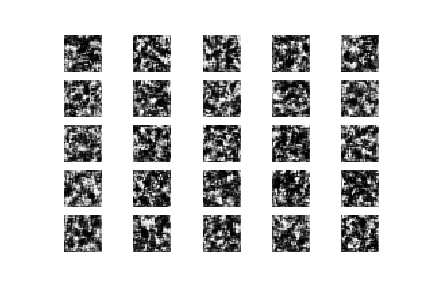

In [13]:
from IPython.display import display
from PIL import Image


path="images/mnist_0.png"
display(Image.open(path))

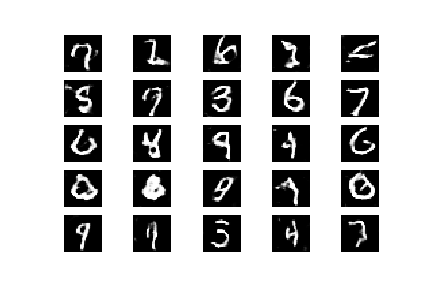

In [14]:

from IPython.display import display
from PIL import Image


path="images/mnist_3950.png"
display(Image.open(path))